In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Final\ Year\ Project/Dataset/Put\ Mask\ On\ images

/content/drive/MyDrive/Final Year Project/Dataset/Put Mask On images


In [ ]:
ls

images/            images14Kupdated.csv  Imageswith14K/  PutMask.ipynb
Images14KUpdated/  Images14KWithMask/    list.txt        replaced.txt


In [ ]:
import pandas as pd
df = pd.read_csv ('images14Kupdated.csv')

In [ ]:
EA, I, LH, W, B, ME, SA = 0, 0, 0, 0, 0, 0, 0
males, females= 0,0


In [ ]:
for ind, row in df.iterrows():
  if row['gender']=='Male':
    males+=1
  else:
    females+=1
  
  if row['race']=='East Asian':
    EA+=1
  elif row['race']=='Indian':
    I+=1
  elif row['race']=='White':
    W+=1
  elif row['race']=='Black':
    B+=1
  elif row['race']=='Middle Eastern':
    ME+=1
  elif row['race']=='Latino_Hispanic':
    LH+=1
  elif row['race']=='Southeast Asian':
    SA+=1

In [ ]:
print("MALES: ",males, "FEMALES: ",females)
print(males+females==11323)

MALES:  5787 FEMALES:  5536
True


In [ ]:
print("East Asian: ", EA)
print("Indian: ", I)
print("White: ", W)
print("Black: ", B)
print("Middle Eastern: ", ME)
print("Latino_Hispanic: ", LH)
print("Southeast Asian: ", SA)
print(EA+I+W+B+SA+LH+ME == 11323)

East Asian:  1591
Indian:  1680
White:  1581
Black:  1533
Middle Eastern:  1598
Latino_Hispanic:  1690
Southeast Asian:  1650
True


In [ ]:
cd Images14KUpdated/

/content/drive/MyDrive/Final Year Project/Dataset/Put Mask On images/Images14KUpdated


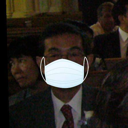

In [ ]:
import os
from PIL import Image
im= Image.open("1-WithMask.jpg").resize((128,128))
im

In [ ]:
from random import shuffle
onlyfiles = os.listdir()
len(onlyfiles)

11323

In [ ]:
onlyfiles= sorted(onlyfiles, key= lambda x: int(x[:-13]))

In [ ]:
from scipy import misc
import imageio
import cv2
X_data =[]
for file in onlyfiles:
    face = cv2.imread(file)
    face = cv2.resize(face, (64, 64) )
    X_data.append(face)
    print(file)

Streaming output truncated to the last 5000 lines.
7856-WithMask.jpg
7857-WithMask.jpg
7858-WithMask.jpg
7859-WithMask.jpg
7860-WithMask.jpg
7862-WithMask.jpg
7863-WithMask.jpg
7864-WithMask.jpg
7865-WithMask.jpg
7866-WithMask.jpg
7867-WithMask.jpg
7868-WithMask.jpg
7869-WithMask.jpg
7870-WithMask.jpg
7871-WithMask.jpg
7872-WithMask.jpg
7873-WithMask.jpg
7875-WithMask.jpg
7877-WithMask.jpg
7879-WithMask.jpg
7880-WithMask.jpg
7881-WithMask.jpg
7882-WithMask.jpg
7883-WithMask.jpg
7884-WithMask.jpg
7887-WithMask.jpg
7890-WithMask.jpg
7891-WithMask.jpg
7892-WithMask.jpg
7894-WithMask.jpg
7895-WithMask.jpg
7896-WithMask.jpg
7897-WithMask.jpg
7900-WithMask.jpg
7901-WithMask.jpg
7902-WithMask.jpg
7903-WithMask.jpg
7906-WithMask.jpg
7907-WithMask.jpg
7908-WithMask.jpg
7909-WithMask.jpg
7911-WithMask.jpg
7912-WithMask.jpg
7913-WithMask.jpg
7914-WithMask.jpg
7917-WithMask.jpg
7919-WithMask.jpg
7920-WithMask.jpg
7921-WithMask.jpg
7923-WithMask.jpg
7924-WithMask.jpg
7925-WithMask.jpg
7926-WithMask

In [ ]:
import numpy as np
X = np.squeeze(X_data)
X.shape

(11323, 64, 64, 3)

In [ ]:
X = X.astype('float32')
X /= 255


In [ ]:
classes= []
for index, row in df.iterrows():
  if row["gender"]=="Male":
    classes.append(0)
  else:
    classes.append(1)
len(classes)

11323

In [ ]:
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [ ]:
categorical_labels = to_categorical(classes, num_classes=2)

In [ ]:
categorical_labels[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
(x_train, y_train), (x_test, y_test) = (X[:9060],categorical_labels[:9060]) , (X[9060:] , categorical_labels[9060:])
(x_valid , y_valid) = (x_test[:1810], y_test[:1810])
(x_test, y_test) = (x_test[1810:], y_test[1810:])

In [ ]:
len(x_train)+len(x_test) + len(x_valid) == len(X)

True

In [ ]:
print(len(x_train),len(x_test), len(x_valid))

9060 453 1810


In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(64,64,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 64)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)             

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=35,
         validation_data=(x_valid, y_valid),)


Epoch 1/35
142/142 [==============================] - 54s 374ms/step - loss: 0.7128 - accuracy: 0.5242 - val_loss: 0.6642 - val_accuracy: 0.6343
Epoch 2/35
142/142 [==============================] - 53s 372ms/step - loss: 0.6420 - accuracy: 0.6326 - val_loss: 0.6000 - val_accuracy: 0.6912
Epoch 3/35
142/142 [==============================] - 53s 372ms/step - loss: 0.5950 - accuracy: 0.6788 - val_loss: 0.5673 - val_accuracy: 0.7072
Epoch 4/35
142/142 [==============================] - 53s 371ms/step - loss: 0.5749 - accuracy: 0.6975 - val_loss: 0.5428 - val_accuracy: 0.7298
Epoch 5/35
142/142 [==============================] - 53s 372ms/step - loss: 0.5324 - accuracy: 0.7317 - val_loss: 0.5379 - val_accuracy: 0.7265
Epoch 6/35
142/142 [==============================] - 53s 372ms/step - loss: 0.5161 - accuracy: 0.7390 - val_loss: 0.5129 - val_accuracy: 0.7492
Epoch 7/35
142/142 [==============================] - 53s 372ms/step - loss: 0.4803 - accuracy: 0.7669 - val_loss: 0.4920 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7991169691085815
